In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp
import math
%matplotlib notebook

In [3]:
def g(x,K,n=2):
    return x**n / (K**n + x**n)

def h(m, k):
    return np.exp(-m*k)

def model(t, Y, beta1, beta2, beta3, d1, d2, mu, k, r, gamma1, gamma2, alpha, K):
    x, y, M, m = Y
    
    dmdt = beta1 * (M - m) * (y /(x+y)) - beta2 * m * (x /(x+y))
    dxdt = mu*g(x, K)*h(m, k) - beta3*m*(x/(x+y)) - d1*x -  gamma1*M*x
    dydt = beta3*m*(x/(x+y))-d2*y-gamma2*M*y
    dMdt = r*M*(1-M/(alpha*(x+y)))
    
    return dxdt, dydt, dMdt, dmdt

In [92]:
y0 = (20_000, 0, 100, 0) # x0, y0, M0, m0

simu = {'t':[],'x':[],'y':[],'M':[],'m':[]}

season = 0

for i in range(0, 8000, 91):
    print(i/91, season, y0)
    if season == 0:
        ret = solve_ivp(model, (i,i+92), y0, t_eval=np.arange(i,i+92), 
           args=(0.1593 , 0.04959, 0.1984, #beta1, beta2, beta3
                 0.02272, 0.2, 500, 0.000075, 0.0165, # d1, d2, mu, k, r
                 1e-7, 1e-7, 0.4784, 8000 # gamma1, gamma2, alpha, K
                ))
    if season == 1:
        ret = solve_ivp(model, (i,i+92), y0, t_eval=np.arange(i,i+92), 
           args=(0.1460 , 0.03721, 0.1460, #beta1, beta2, beta3
                 0.04, 0.2, 1500, 0.00003125, 0.0165, # d1, d2, mu, k, r
                 1e-7, 1e-7, 0.5, 12000 # gamma1, gamma2, alpha, K
                ))
    if season == 2:
        ret = solve_ivp(model, (i,i+92), y0, t_eval=np.arange(i,i+92), 
           args=(0.1489 , 0.04750, 0.1900, #beta1, beta2, beta3
                 0.02272, 0.2, 500, 0.000075, 0.0045, # d1, d2, mu, k, r
                 1e-7, 1e-7, 0.5, 8000 # gamma1, gamma2, alpha, K
                ))
    if season == 3:
        ret = solve_ivp(model, (i,i+92), y0, t_eval=np.arange(i,i+92), 
           args=(0.04226 , 0.00846, 0.03384, #beta1, beta2, beta3
                 0.005263, 0.005300, 0, 0.000075, 0.0045, # d1, d2, mu, k, r
                 1e-7, 1e-7, 0.4784, 6000 # gamma1, gamma2, alpha, K
                ))
    simu['t'].append(ret.t)
    simu['x'].append(ret.y[0])
    simu['y'].append(ret.y[1])
    simu['M'].append(ret.y[2])
    simu['m'].append(ret.y[3])

    y0 = simu['x'][-1][-1], simu['y'][-1][-1], simu['M'][-1][-1], simu['m'][-1][-1]
        
    
    season += 1 
    if season >= 4:
        season = 0

0.0 0 (20000, 0, 100, 0)
1.0 1 (18873.015772735453, 0.0, 432.42433735244583, 0.0)
2.0 2 (31932.29232738186, 0.0, 1756.1491821311172, 0.0)
3.0 3 (21031.667415491193, 0.0, 2464.856011619985, 0.0)
4.0 0 (12695.729356684587, 0.0, 3189.36037821481, 0.0)
5.0 1 (16475.366559799335, 0.0, 5682.924341270141, 0.0)
6.0 2 (30928.734740381296, 0.0, 10370.121253849644, 0.0)
7.0 3 (20003.73783135188, 0.0, 10767.832492672527, 0.0)
8.0 0 (11303.257825338807, 0.0, 9092.22277242691, 0.0)
9.0 1 (15721.089871438984, 0.0, 7223.304547817319, 0.0)
10.0 2 (30732.995161631734, 0.0, 11249.22258712703, 0.0)
11.0 3 (19901.411804716103, 0.0, 11359.876588636389, 0.0)
12.0 0 (11203.324435318606, 0.0, 9333.878378616553, 0.0)
13.0 1 (15675.422956716158, 0.0, 7226.099172313877, 0.0)
14.0 2 (30727.129582472586, 0.0, 11243.580654409294, 0.0)
15.0 3 (19900.857575090813, 0.0, 11355.720627217403, 0.0)
16.0 0 (11203.318954162978, 0.0, 9331.971005415215, 0.0)
17.0 1 (15675.466142885303, 0.0, 7225.860602120147, 0.0)
18.0 2 (3072

In [96]:
for each_key in simu:
    arr = simu[each_key][0]
    for each_array in simu[each_key][1:]:
        arr = np.concatenate([arr, each_array[1:]])
    simu[each_key] = arr

<IPython.core.display.Javascript object>


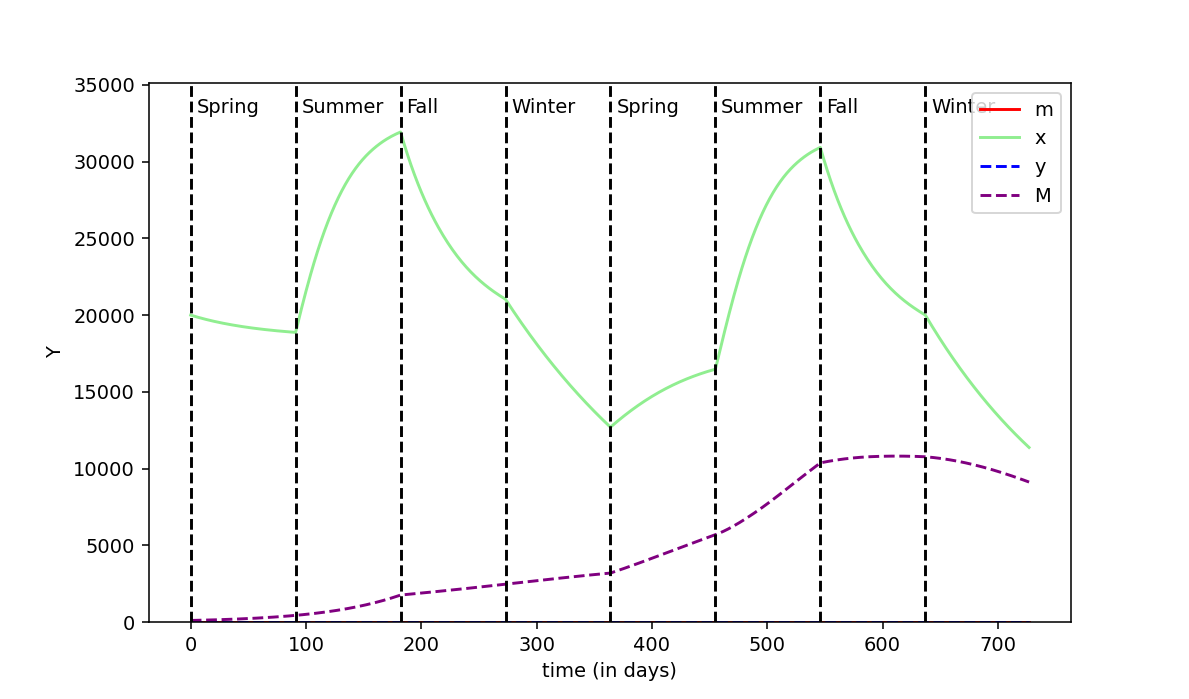

In [132]:
fig, ax = plt.subplots(1,1,figsize=(8.5,5))
top = max(simu['x'][:728])
ax.plot(simu['m'][:728], color='red', label='m')
ax.plot(simu['x'][:728], color='lightgreen', label='x')
ax.plot(simu['y'][:728], color='blue', linestyle='--',label='y')
ax.plot(simu['M'][:728], color='purple', linestyle='--', label='M')

seasons = ['Spring', 'Summer', 'Fall', 'Winter']
for j in np.arange(0,728,91):
    ax.axvline(j, color='black', linestyle='--')
    ax.annotate(seasons[int(j/91%4)], (j, top), rotation=0, textcoords='offset points', xytext=(3,10))
    
ax.set_ylim((0,top*1.1))
ax.set_ylabel('Y')
ax.set_xlabel('time (in days)')
ax.legend()

<IPython.core.display.Javascript object>


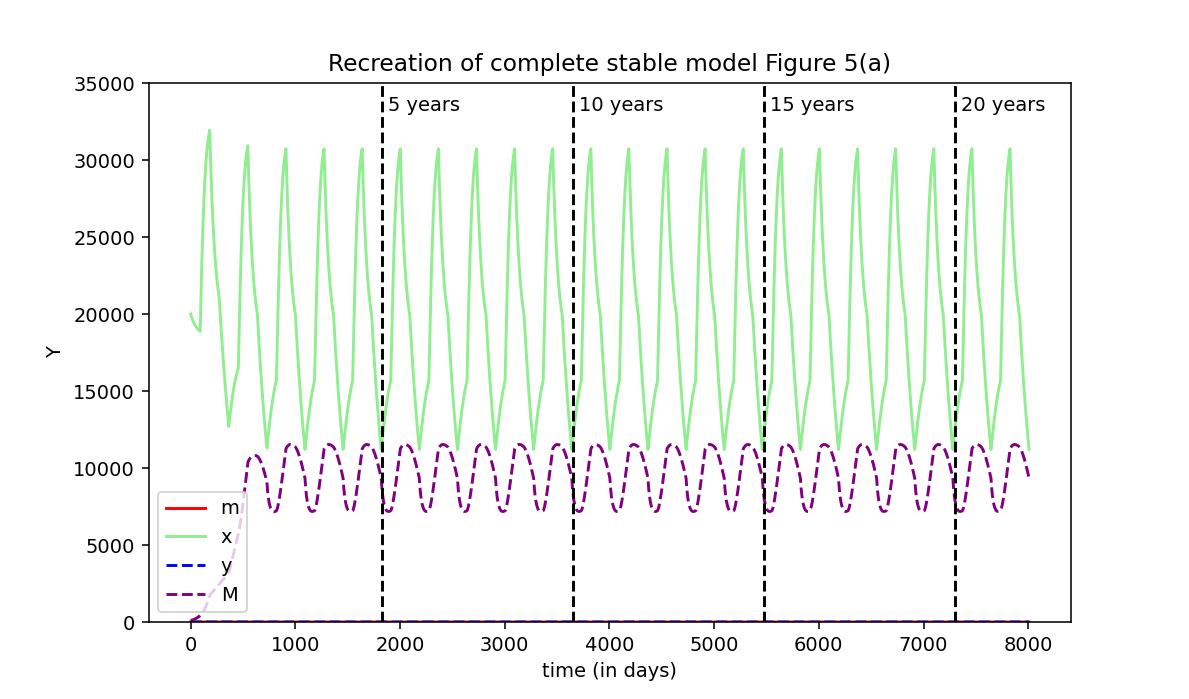

In [141]:
fig, ax = plt.subplots(1,1,figsize=(8.5,5))

ax.plot(simu['m'], color='red', label='m')
ax.plot(simu['x'], color='lightgreen', label='x')
ax.plot(simu['y'], color='blue', linestyle='--',label='y')
ax.plot(simu['M'], color='purple', linestyle='--', label='M')
ax.axvline(1825, color='black', linestyle='--')
ax.annotate('5 years', (1825, top), rotation=0, textcoords='offset points', xytext=(3,10))
ax.axvline(3650, color='black', linestyle='--')
ax.annotate('10 years', (3650, top), rotation=0, textcoords='offset points', xytext=(3,10))
ax.axvline(5475, color='black', linestyle='--')
ax.annotate('15 years', (5475, top), rotation=0, textcoords='offset points', xytext=(3,10))
ax.axvline(7300, color='black', linestyle='--')
ax.annotate('20 years', (7300, top), rotation=0, textcoords='offset points', xytext=(3,10))
ax.set_title('Recreation of complete stable model Figure 5(a)')
ax.set_ylim((0,3.5e4))
ax.set_ylabel('Y')
ax.set_xlabel('time (in days)')
ax.legend(loc='lower left')